In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sdf
import re
import os
import glob
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)

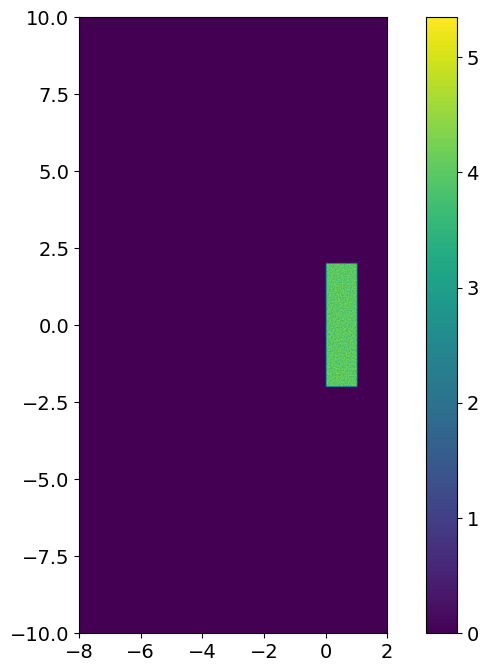

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sdf
import re
import os
import glob
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)

DATA_DIR = "14run"
ALL_FILES = glob.glob(f"{DATA_DIR}/*sdf")
ALL_FILES.sort()
POINTS = len(ALL_FILES)
PI = np.pi

with open(os.path.join(DATA_DIR, "input.deck"), "r") as myfile:
    data = myfile.read()
def find_value(info):
    regex = re.compile(rf"\s{info}\s*=\s*-?(\d+\.?\d*)")
    match = regex.search(data)
    if match:
        return float(match.group(1))
    else:
        return None
    
def find_angle(data):
    angle_reg = re.compile("upper_theta\s+=\s+(\d{0,3})\s{0,3}\*?\s{0,3}pi\s{0,3}\/\s{0,3}(\d{0,3})")
    try:
        a, b = angle_reg.search(data).groups()
    except AttributeError:
        angle_pretty = 0
        angle_rad = 0
        angle_degree = 0
        return angle_pretty, angle_degree, angle_rad

    angle_pretty = f"{a}π/{b}"
    if not a and not b:
        raise ValueError("Angle is not parsed correctly.")
    if not a:
        a = 1
    if not b:
        b = 1
    angle_rad = int(a) * PI / int(b)
    angle_degree = angle_rad * 180 / PI
    angle_degree = round(angle_degree, 1)
    return angle_pretty, angle_degree, angle_rad

angle_pretty, angle_degree, ANGLE = find_angle(data)

raw_data = sdf.read(ALL_FILES[0])
lambd = 1e-6
c = 3e8
omega = 2*np.pi*c/lambd
n_c = omega*omega/(4*np.pi*np.pi*81)
X, Y = raw_data.Grid_Grid.data
X = X/lambd
Y = Y/lambd
X_MIN = X.min()
X_MAX = X.max()
Y_MIN = Y.min()
Y_MAX = Y.max()
NX = int(find_value("cells_x"))
NY = int(find_value("cells_y"))
EXTENT = [X_MIN, X_MAX, Y_MIN, Y_MAX]
plt.imshow(raw_data.Derived_Number_Density_Electron.data.T/n_c, extent=EXTENT, origin="lower")
# plt.scatter(x0, y0, marker="x", color="red")
plt.colorbar()

In [3]:
DATA_DIR = "14run"
ALL_FILES = glob.glob(f"{DATA_DIR}/*sdf")
ALL_FILES.sort()
POINTS = len(ALL_FILES)
PI = np.pi

with open(os.path.join(DATA_DIR, "input.deck"), "r") as myfile:
    data = myfile.read()
def find_value(info):
    regex = re.compile(rf"\s{info}\s*=\s*-?(\d+\.?\d*)")
    match = regex.search(data)
    if match:
        return float(match.group(1))
    else:
        return None
    
def find_angle(data):
    angle_reg = re.compile("upper_theta\s+=\s+(\d{0,3})\s{0,3}\*?\s{0,3}pi\s{0,3}\/\s{0,3}(\d{0,3})")
    try:
        a, b = angle_reg.search(data).groups()
    except AttributeError:
        angle_pretty = 0
        angle_rad = 0
        angle_degree = 0
        return angle_pretty, angle_degree, angle_rad

    angle_pretty = f"{a}π/{b}"
    if not a and not b:
        raise ValueError("Angle is not parsed correctly.")
    if not a:
        a = 1
    if not b:
        b = 1
    angle_rad = int(a) * PI / int(b)
    angle_degree = angle_rad * 180 / PI
    angle_degree = round(angle_degree, 1)
    return angle_pretty, angle_degree, angle_rad

angle_pretty, angle_degree, ANGLE = find_angle(data)

In [4]:
angle_degree, ANGLE, angle_pretty

(45.0, 0.7853981633974483, 'π/4')

In [5]:
raw_data = sdf.read(ALL_FILES[0])

In [6]:
lambd = 1e-6
c = 3e8
omega = 2*np.pi*c/lambd
n_c = omega*omega/(4*np.pi*np.pi*81)

In [7]:
X, Y = raw_data.Grid_Grid.data
X = X/lambd
Y = Y/lambd
X_MIN = X.min()
X_MAX = X.max()
Y_MIN = Y.min()
Y_MAX = Y.max()
NX = int(find_value("cells_x"))
NY = int(find_value("cells_y"))
EXTENT = [X_MIN, X_MAX, Y_MIN, Y_MAX]
NX = 1000

In [8]:
def x_position_to_node(x):
    return int((x - X_MIN)/(X_MAX - X_MIN)*NX)

def y_position_to_node(y):
    return int((y - Y_MIN)/(Y_MAX - Y_MIN)*NY)

def get_y_for_x(x):
    return x*np.tan(ANGLE)

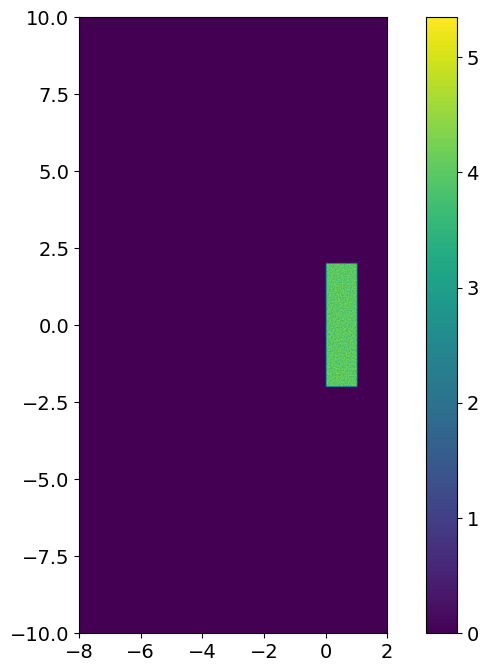

In [9]:
# x0 = -9
# y0 = get_y_for_x(x0)
# x0_node = x_position_to_node(x0)
# y0_node = y_position_to_node(y0)

plt.imshow(raw_data.Derived_Number_Density_Electron.data.T/n_c, extent=EXTENT, origin="lower")
# plt.scatter(x0, y0, marker="x", color="red")
plt.colorbar()

In [10]:
def plot_field(data_dir, ax, component="y"):
    raw_data = sdf.read(data_dir)
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component].data.T
    t = raw_data.Header['time']*1e15
    field = field/(field.max()+1e-10)
    ax.imshow(field**2, cmap='jet', origin='lower',
    extent=EXTENT,
    aspect='auto',
    # interpolation='nearest',
    )
    ax.set_xlabel('$x \, [\mu m]$')
    ax.set_ylabel('$y \, [\mu m]$')
    ax.set_title(f't = {t:.1f} fs')

In [11]:

def get_field(id, component):
    raw_data = sdf.read(ALL_FILES[id])
    comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
    field = comp[component].data.T
    return field

In [ ]:
x_b = -5
y_b = -get_y_for_x(x_b)
x_a = -2
y_a = get_y_for_x(x_a)
x_0 = 0
y_0 = get_y_for_x(x_0)

x_b_node = x_position_to_node(x_b)
y_b_node = y_position_to_node(y_b)
x_a_node = x_position_to_node(x_a)
y_a_node = y_position_to_node(y_a)
x_0_node = x_position_to_node(x_0)
y_0_node = y_position_to_node(y_0)
point_a = [x_a_node, y_a_node]
point_b = [x_b_node, y_b_node]
point_0 = [x_0_node, y_0_node]

300 750


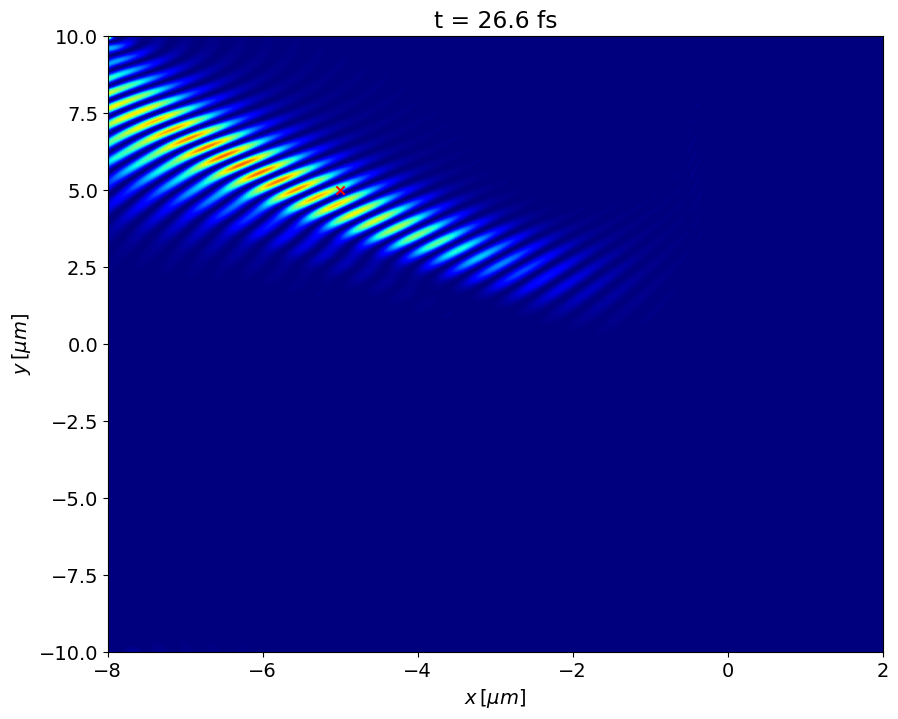

In [21]:
fig, ax = plt.subplots(1, 1)
x0 = -5
y0 = -get_y_for_x(x0)
x0_node = x_position_to_node(x0)
y0_node = y_position_to_node(y0)
print(x0_node, y0_node)
plot_field(ALL_FILES[2], ax, component="y")
ax.scatter(x0, y0, marker="x", color="red")

800 500


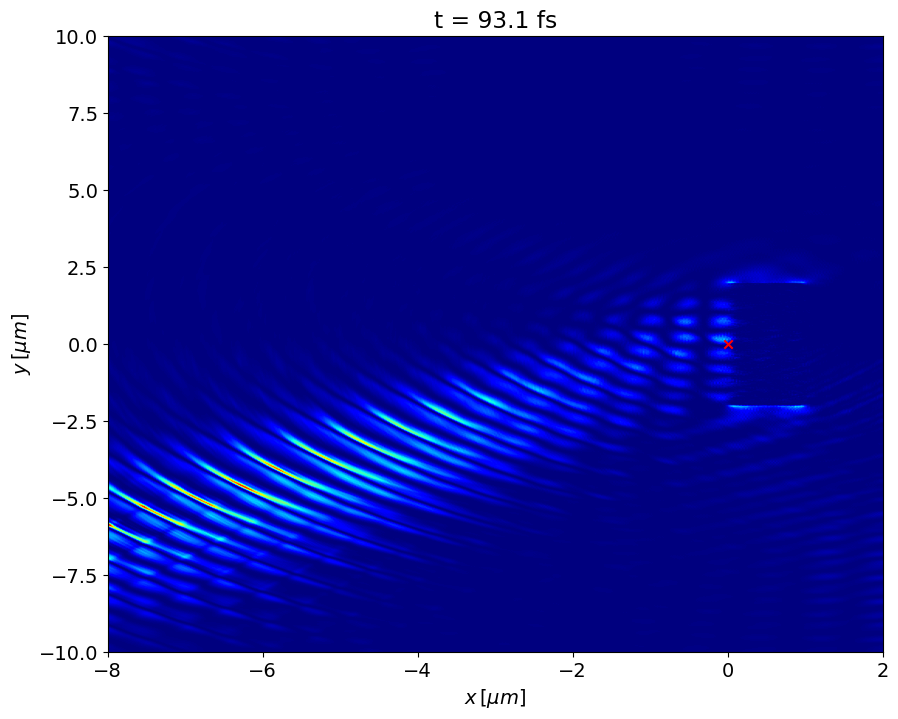

In [26]:
fig, ax = plt.subplots(1, 1)
x0 = -0
y0 = get_y_for_x(x0)
x0_node = x_position_to_node(x0)
y0_node = y_position_to_node(y0)
print(x0_node, y0_node)
plot_field(ALL_FILES[-2], ax, component="y")
ax.scatter(x0, y0, marker="x", color="red")

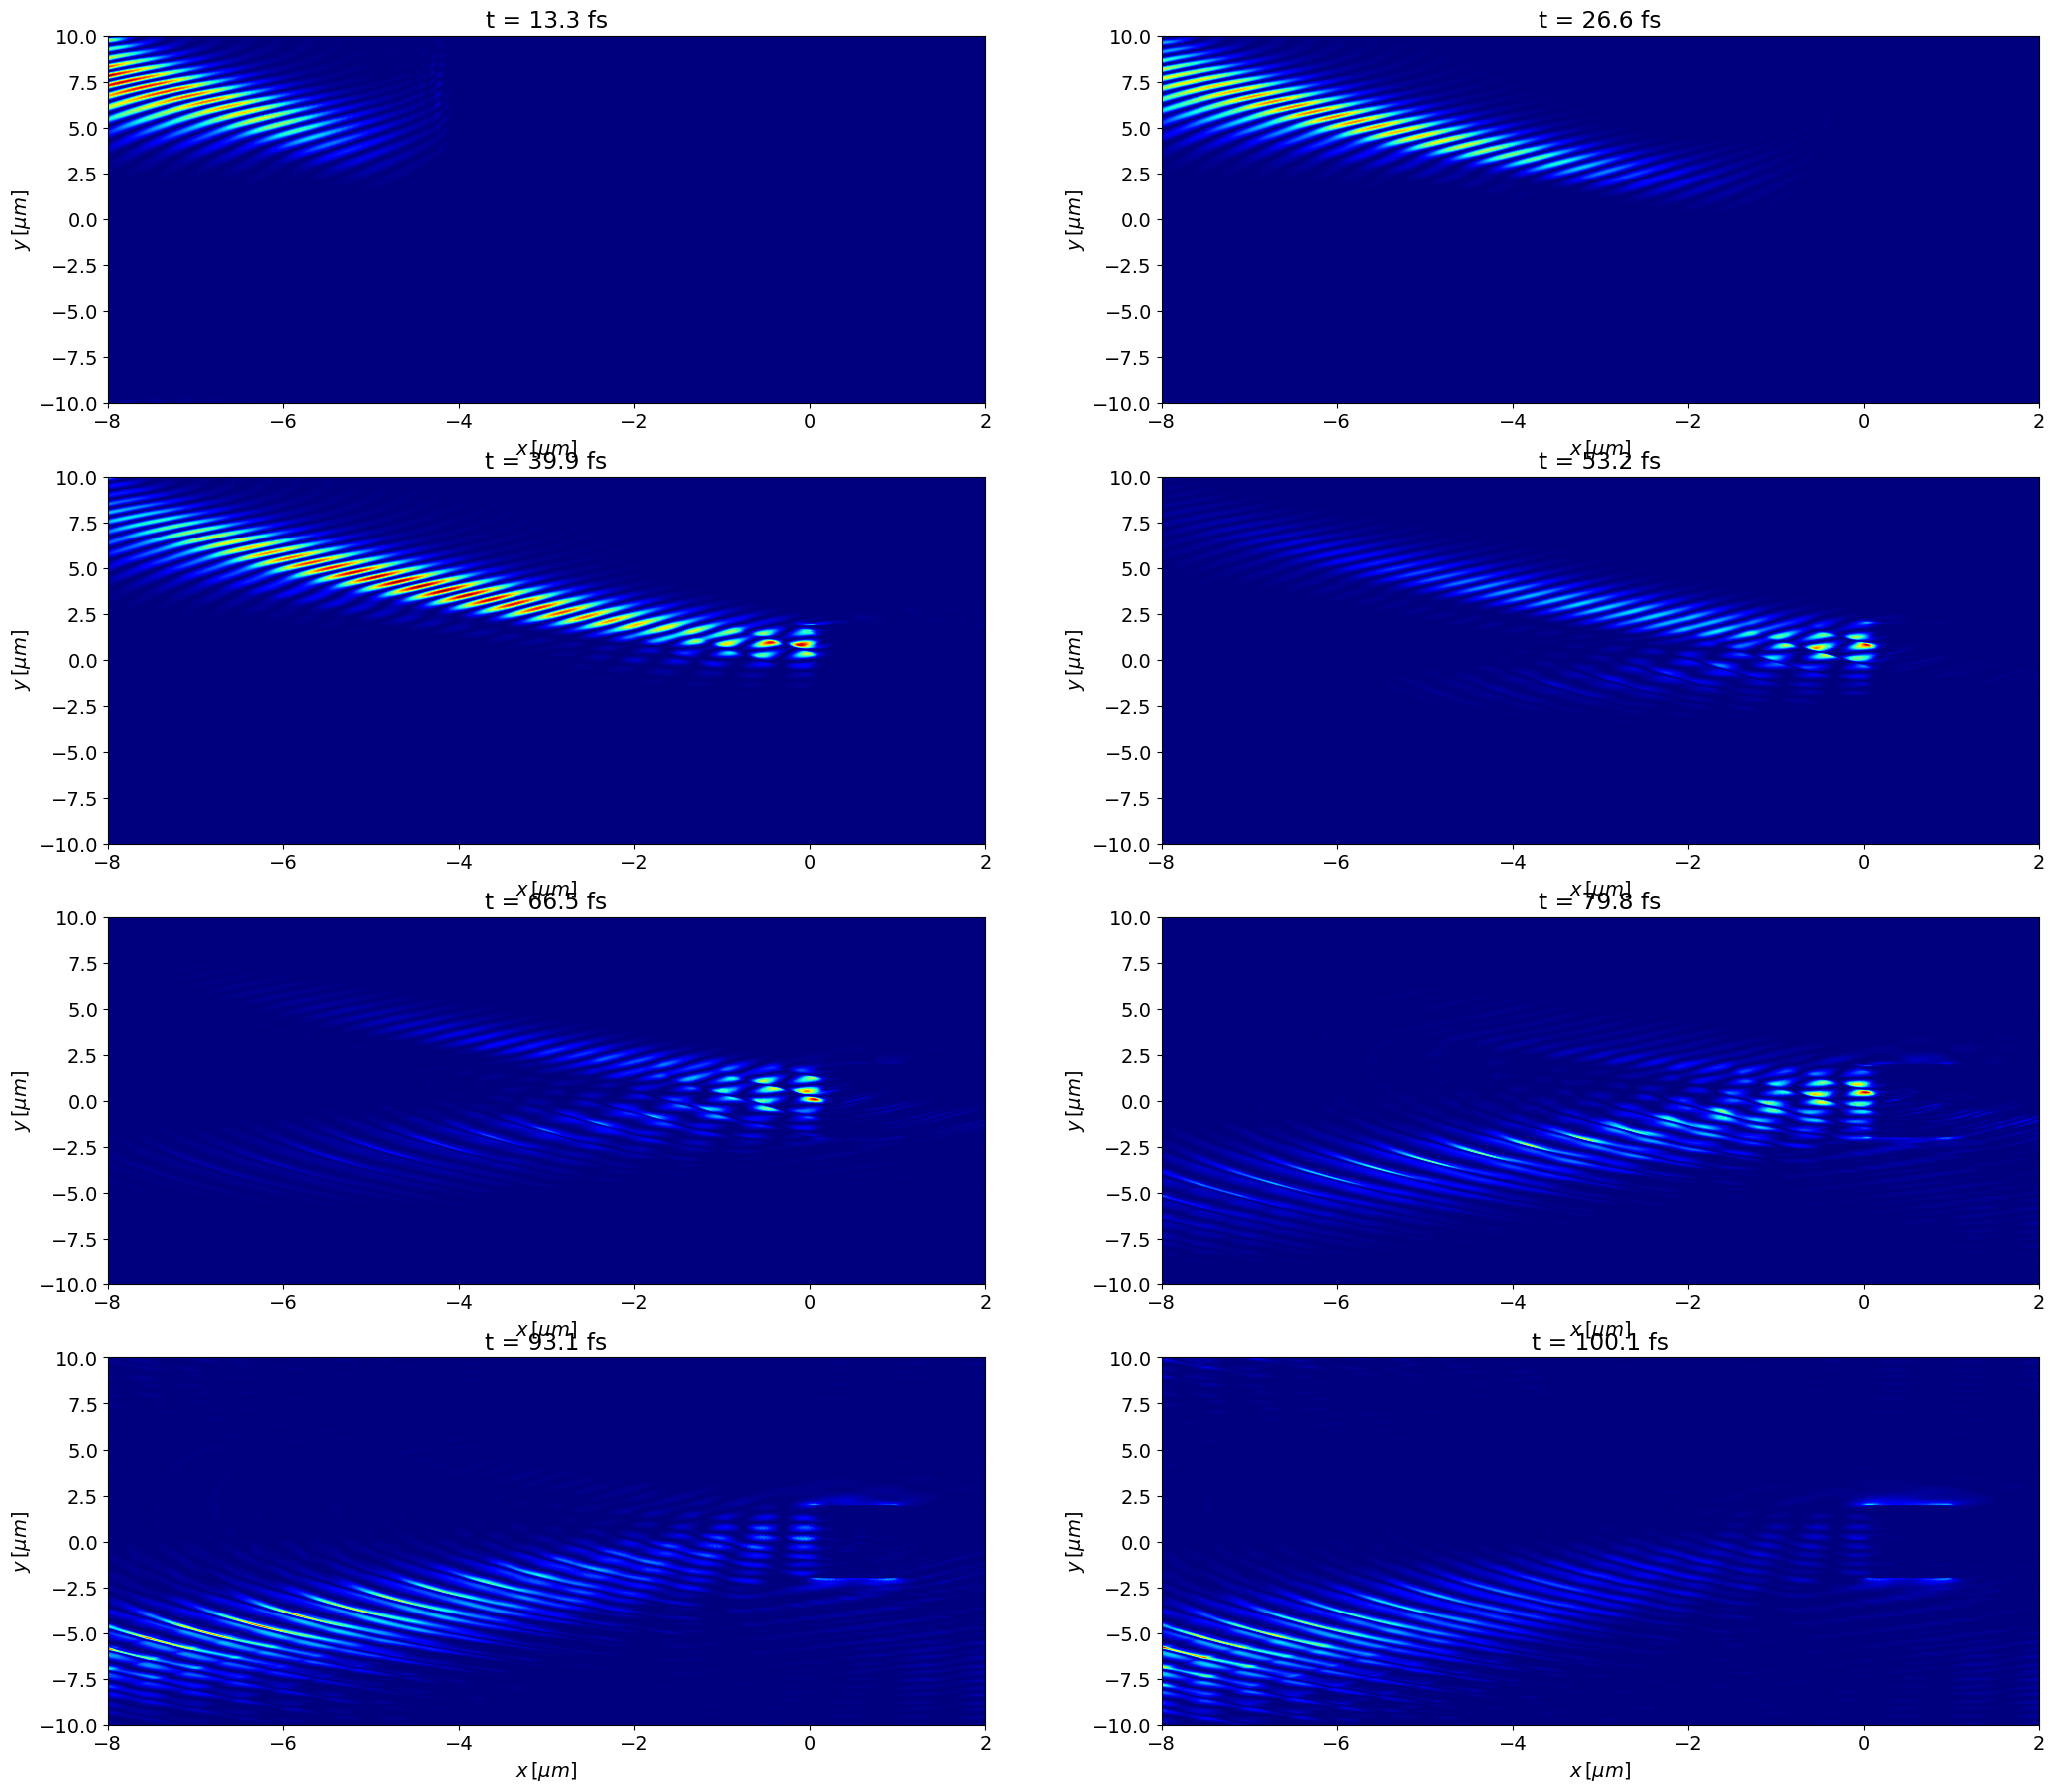

In [123]:
fig, ax = plt.subplots(4, 2, figsize=(25, 22))
ax = ax.flatten()
i = 0
for dir in ALL_FILES[1:]:
    plot_field(dir, ax[i], component="y")
    i += 1
    if i == 8:
        break

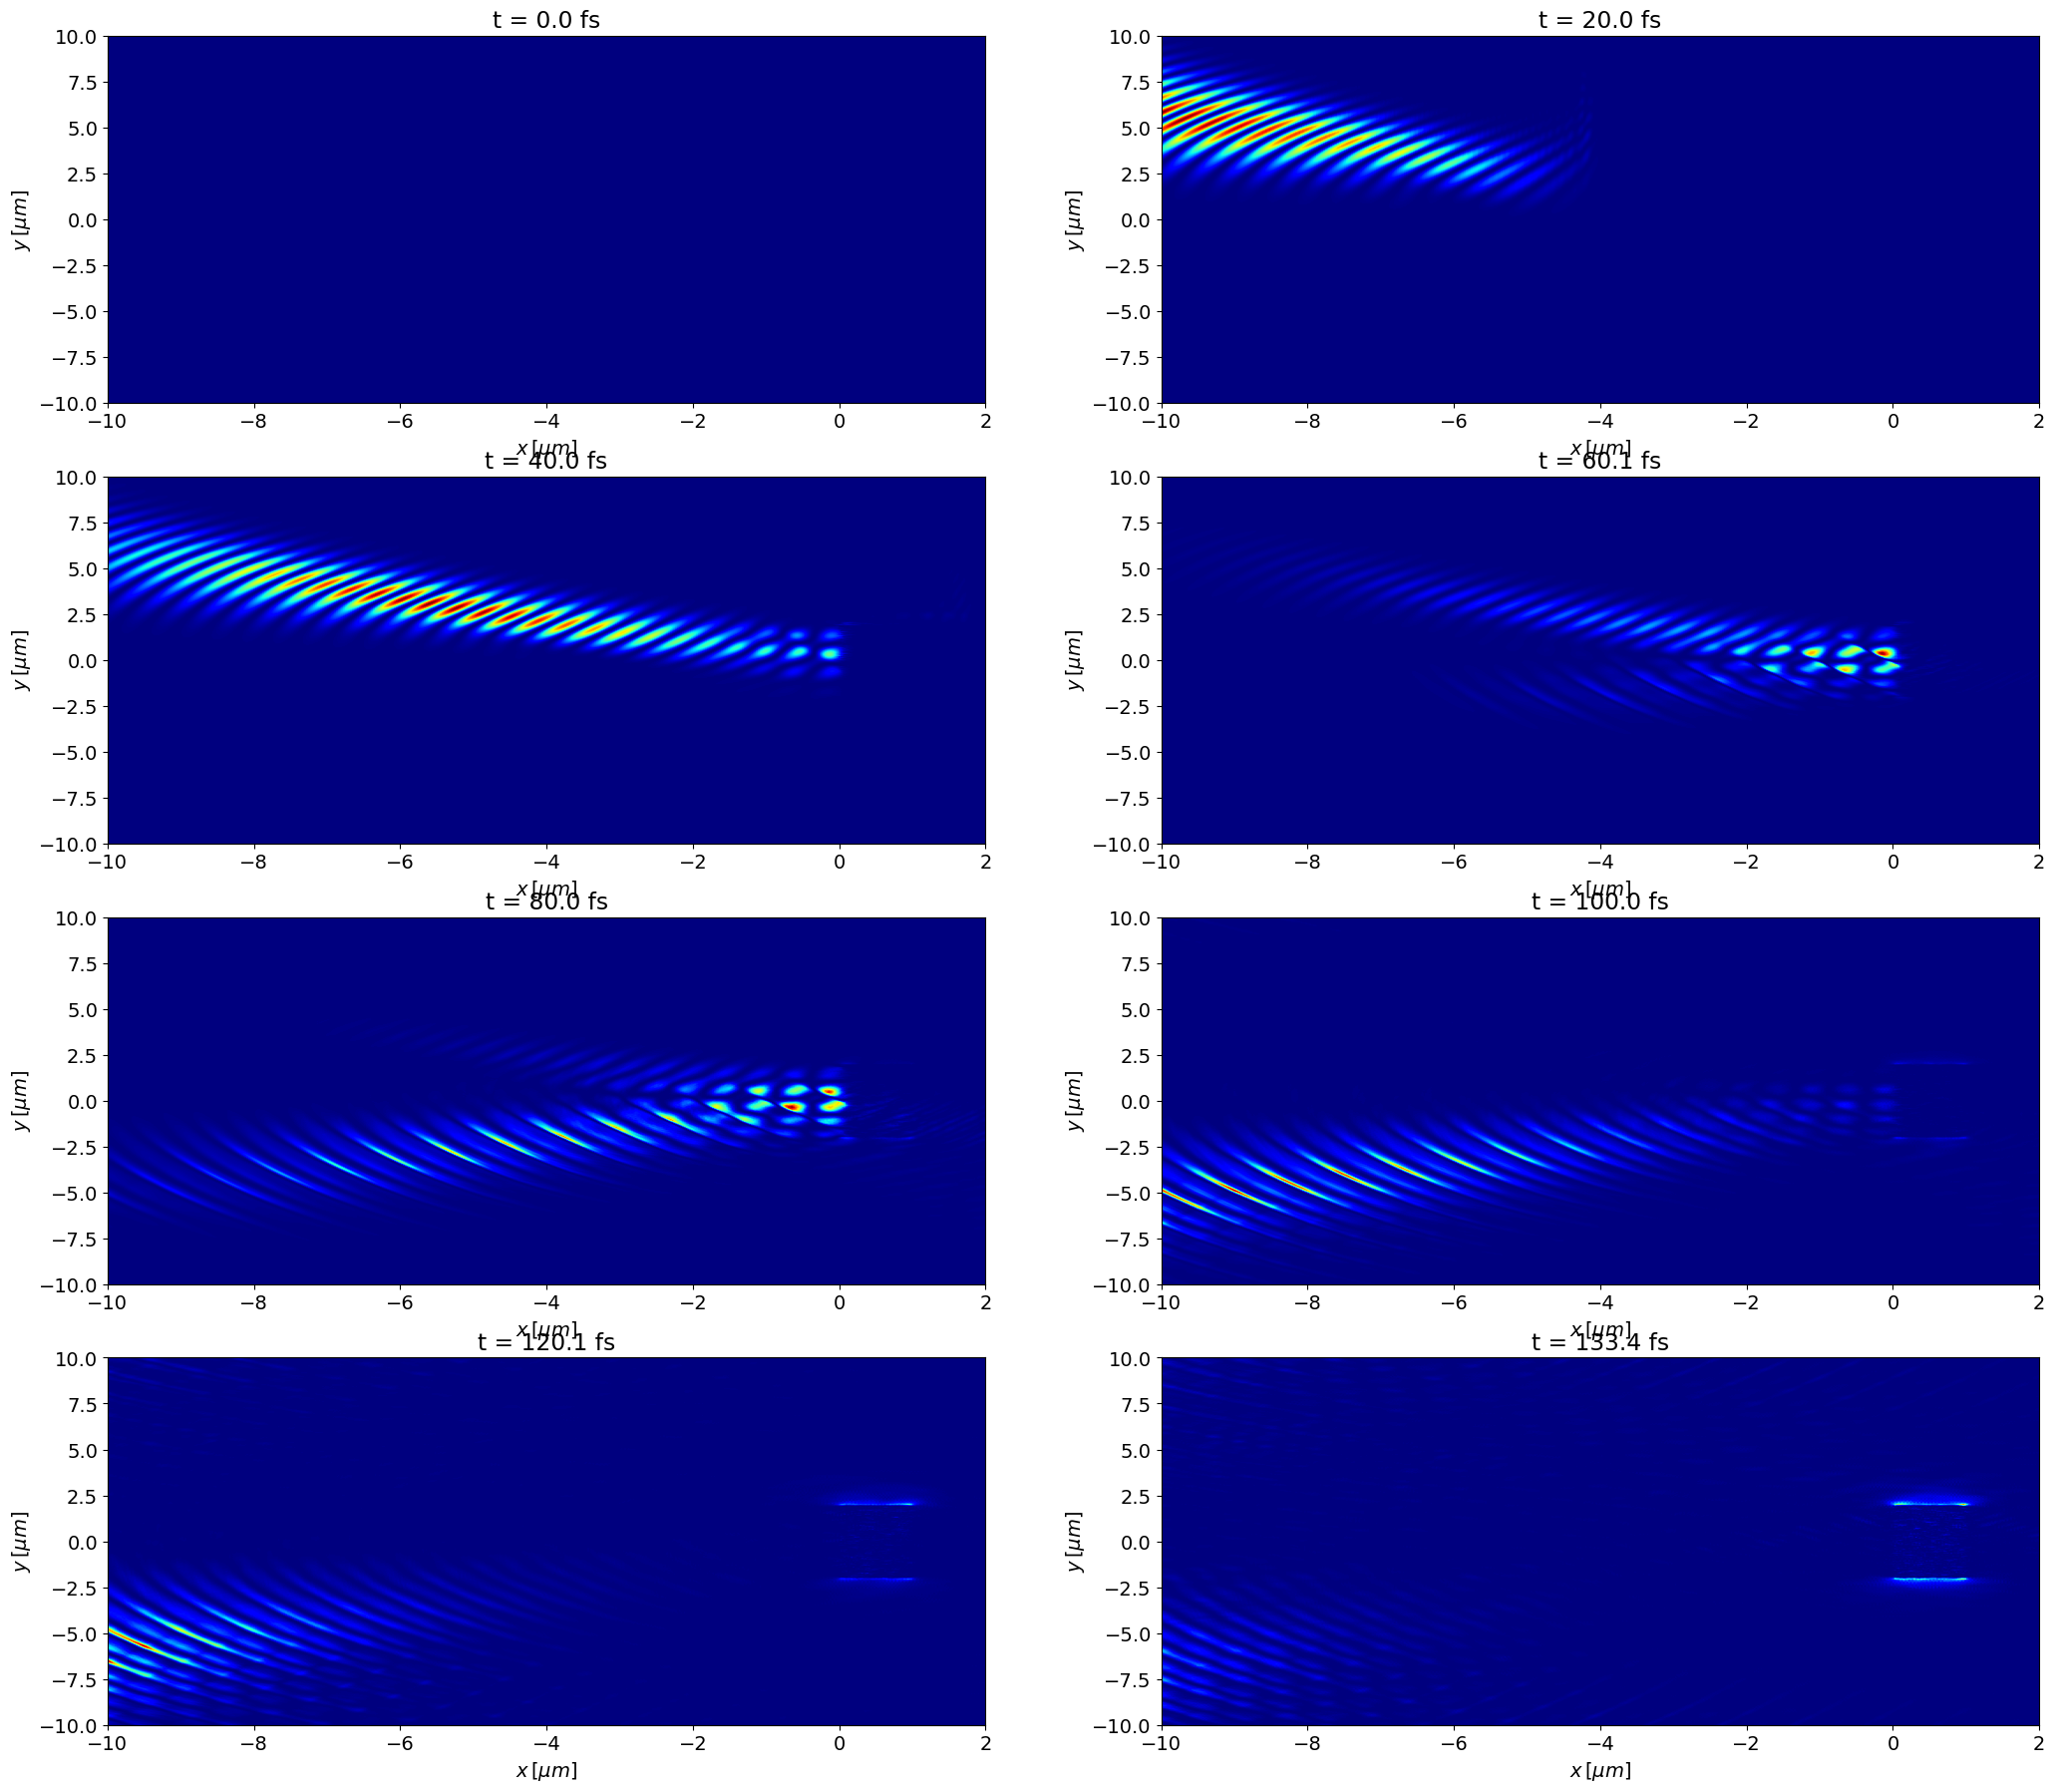

In [38]:
fig, ax = plt.subplots(4, 2, figsize=(25, 22))
ax = ax.flatten()
i = 0
for dir in ALL_FILES:
    plot_field(dir, ax[i], component="y")
    i += 1
    if i == 8:
        break

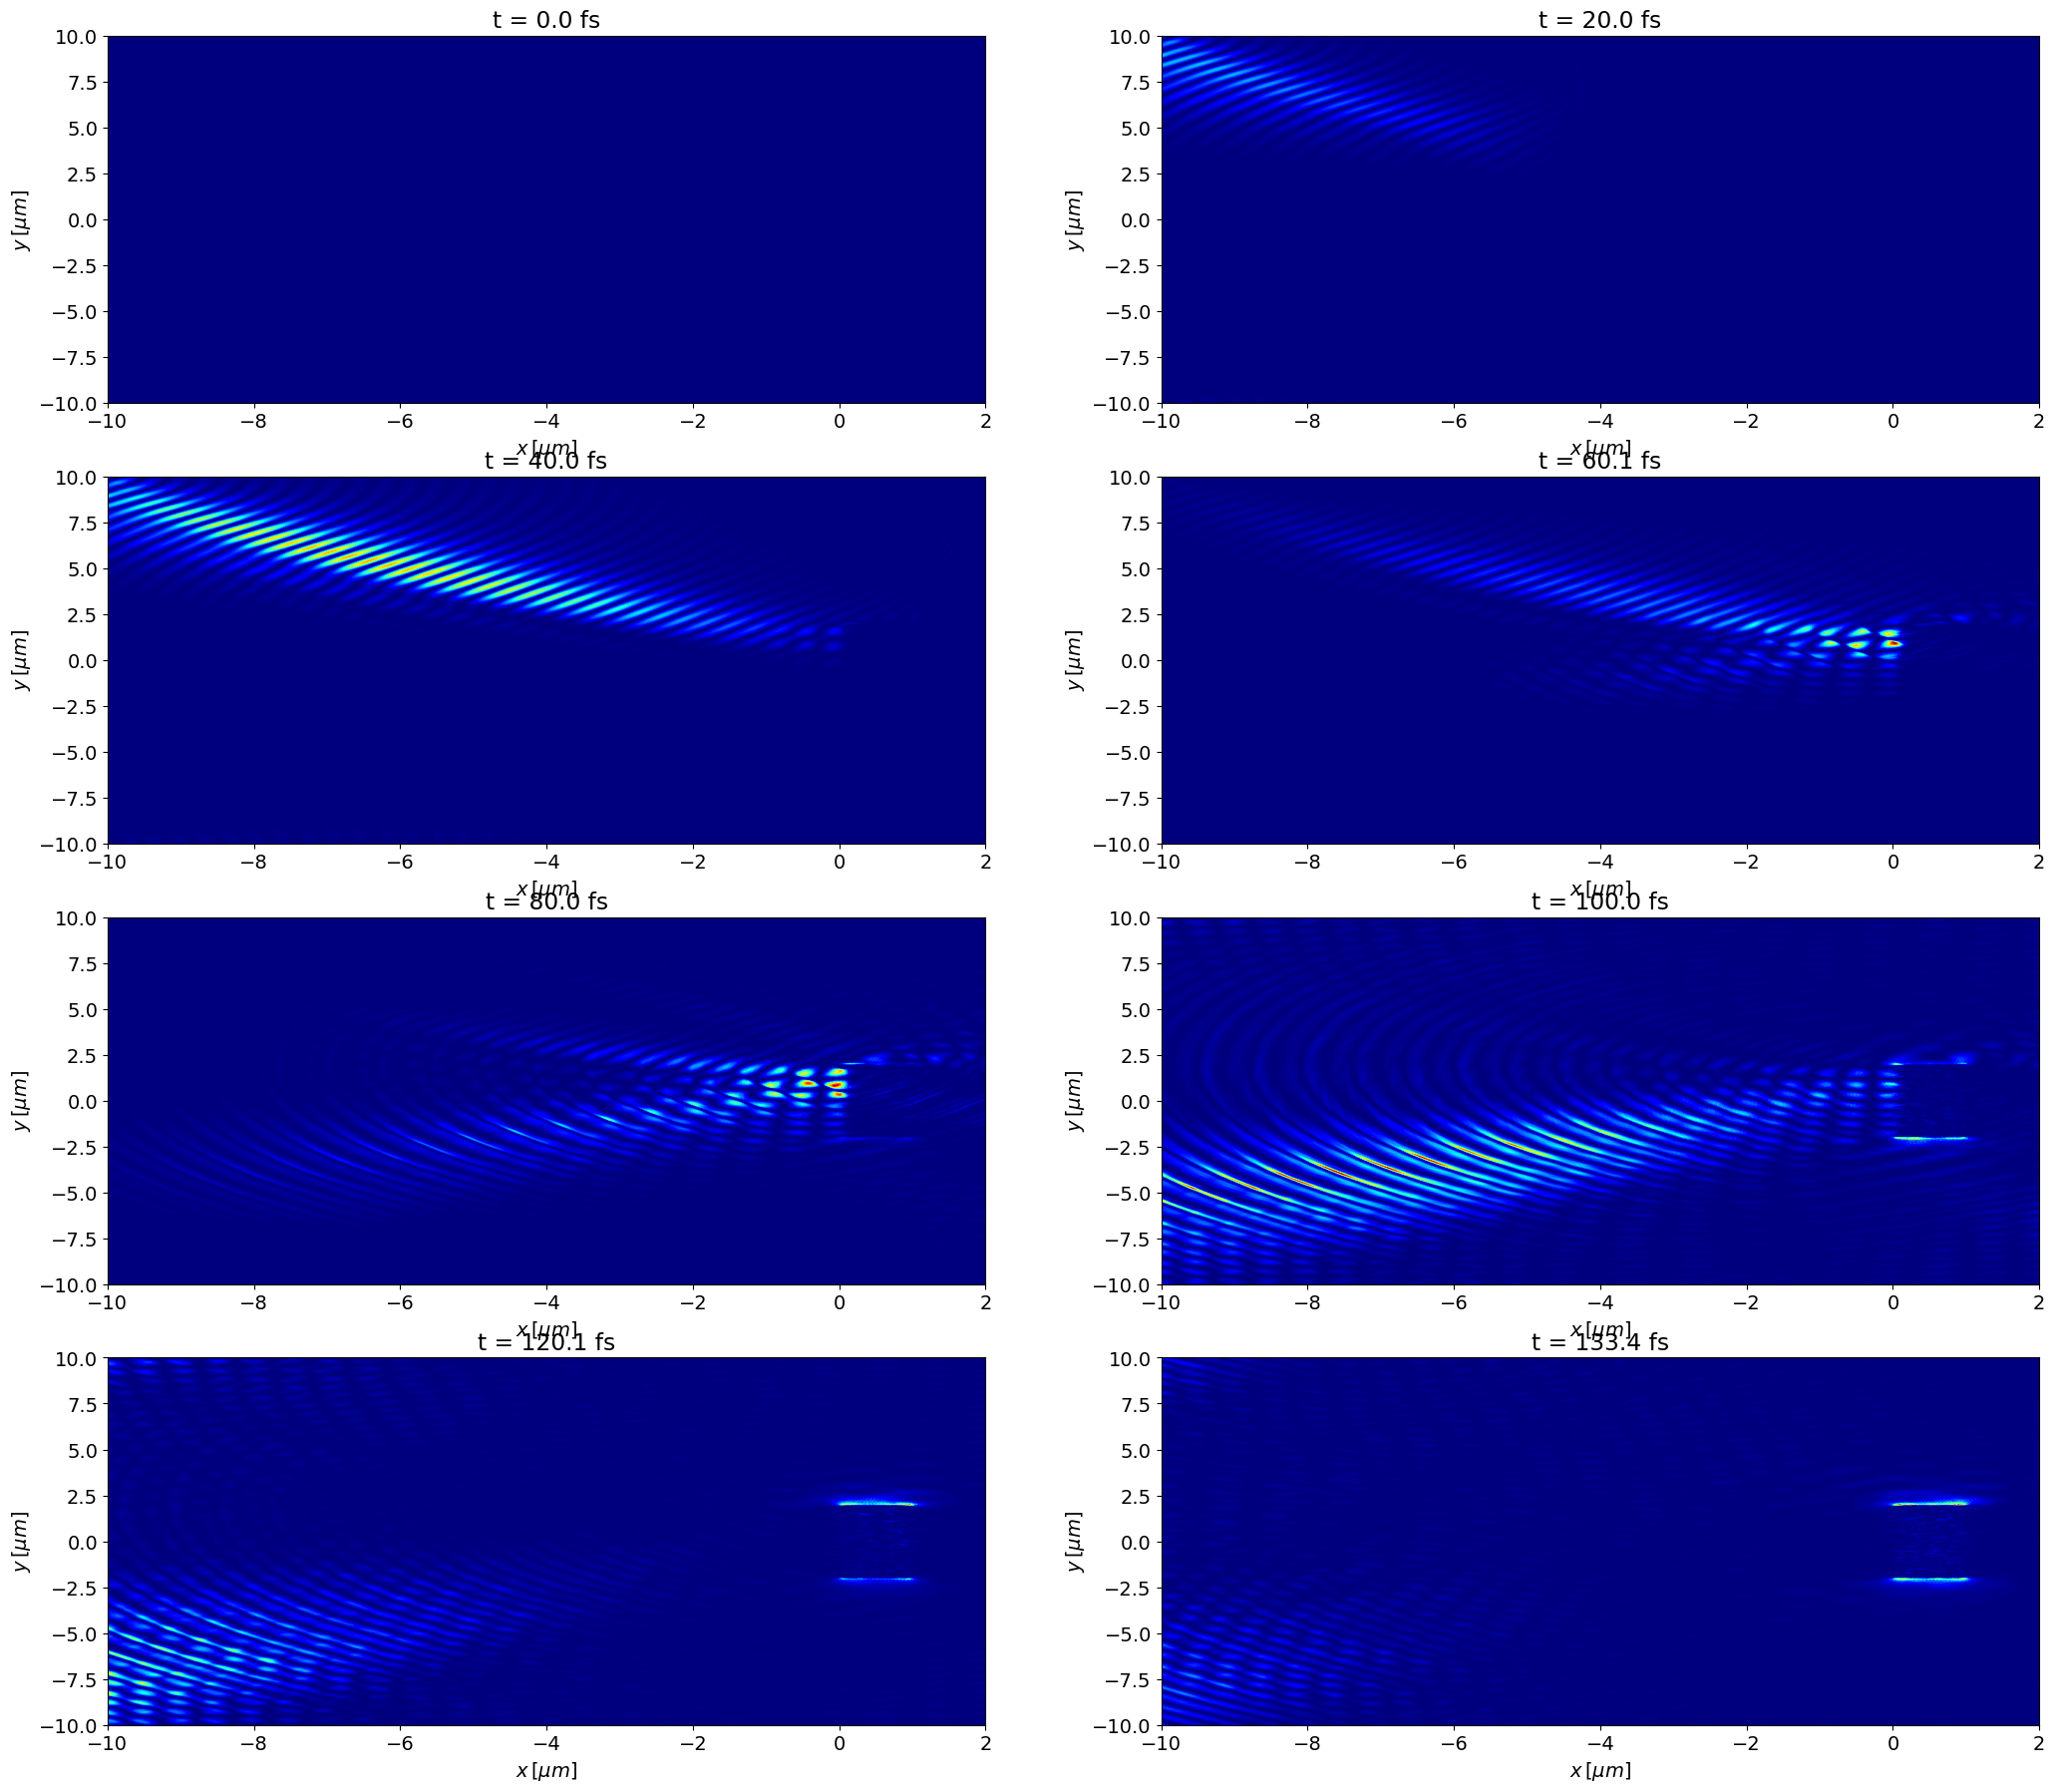

In [37]:
fig, ax = plt.subplots(4, 2, figsize=(25, 22))
ax = ax.flatten()
i = 0
for dir in ALL_FILES:
    plot_field(dir, ax[i], component="y")
    i += 1
    if i == 8:
        break

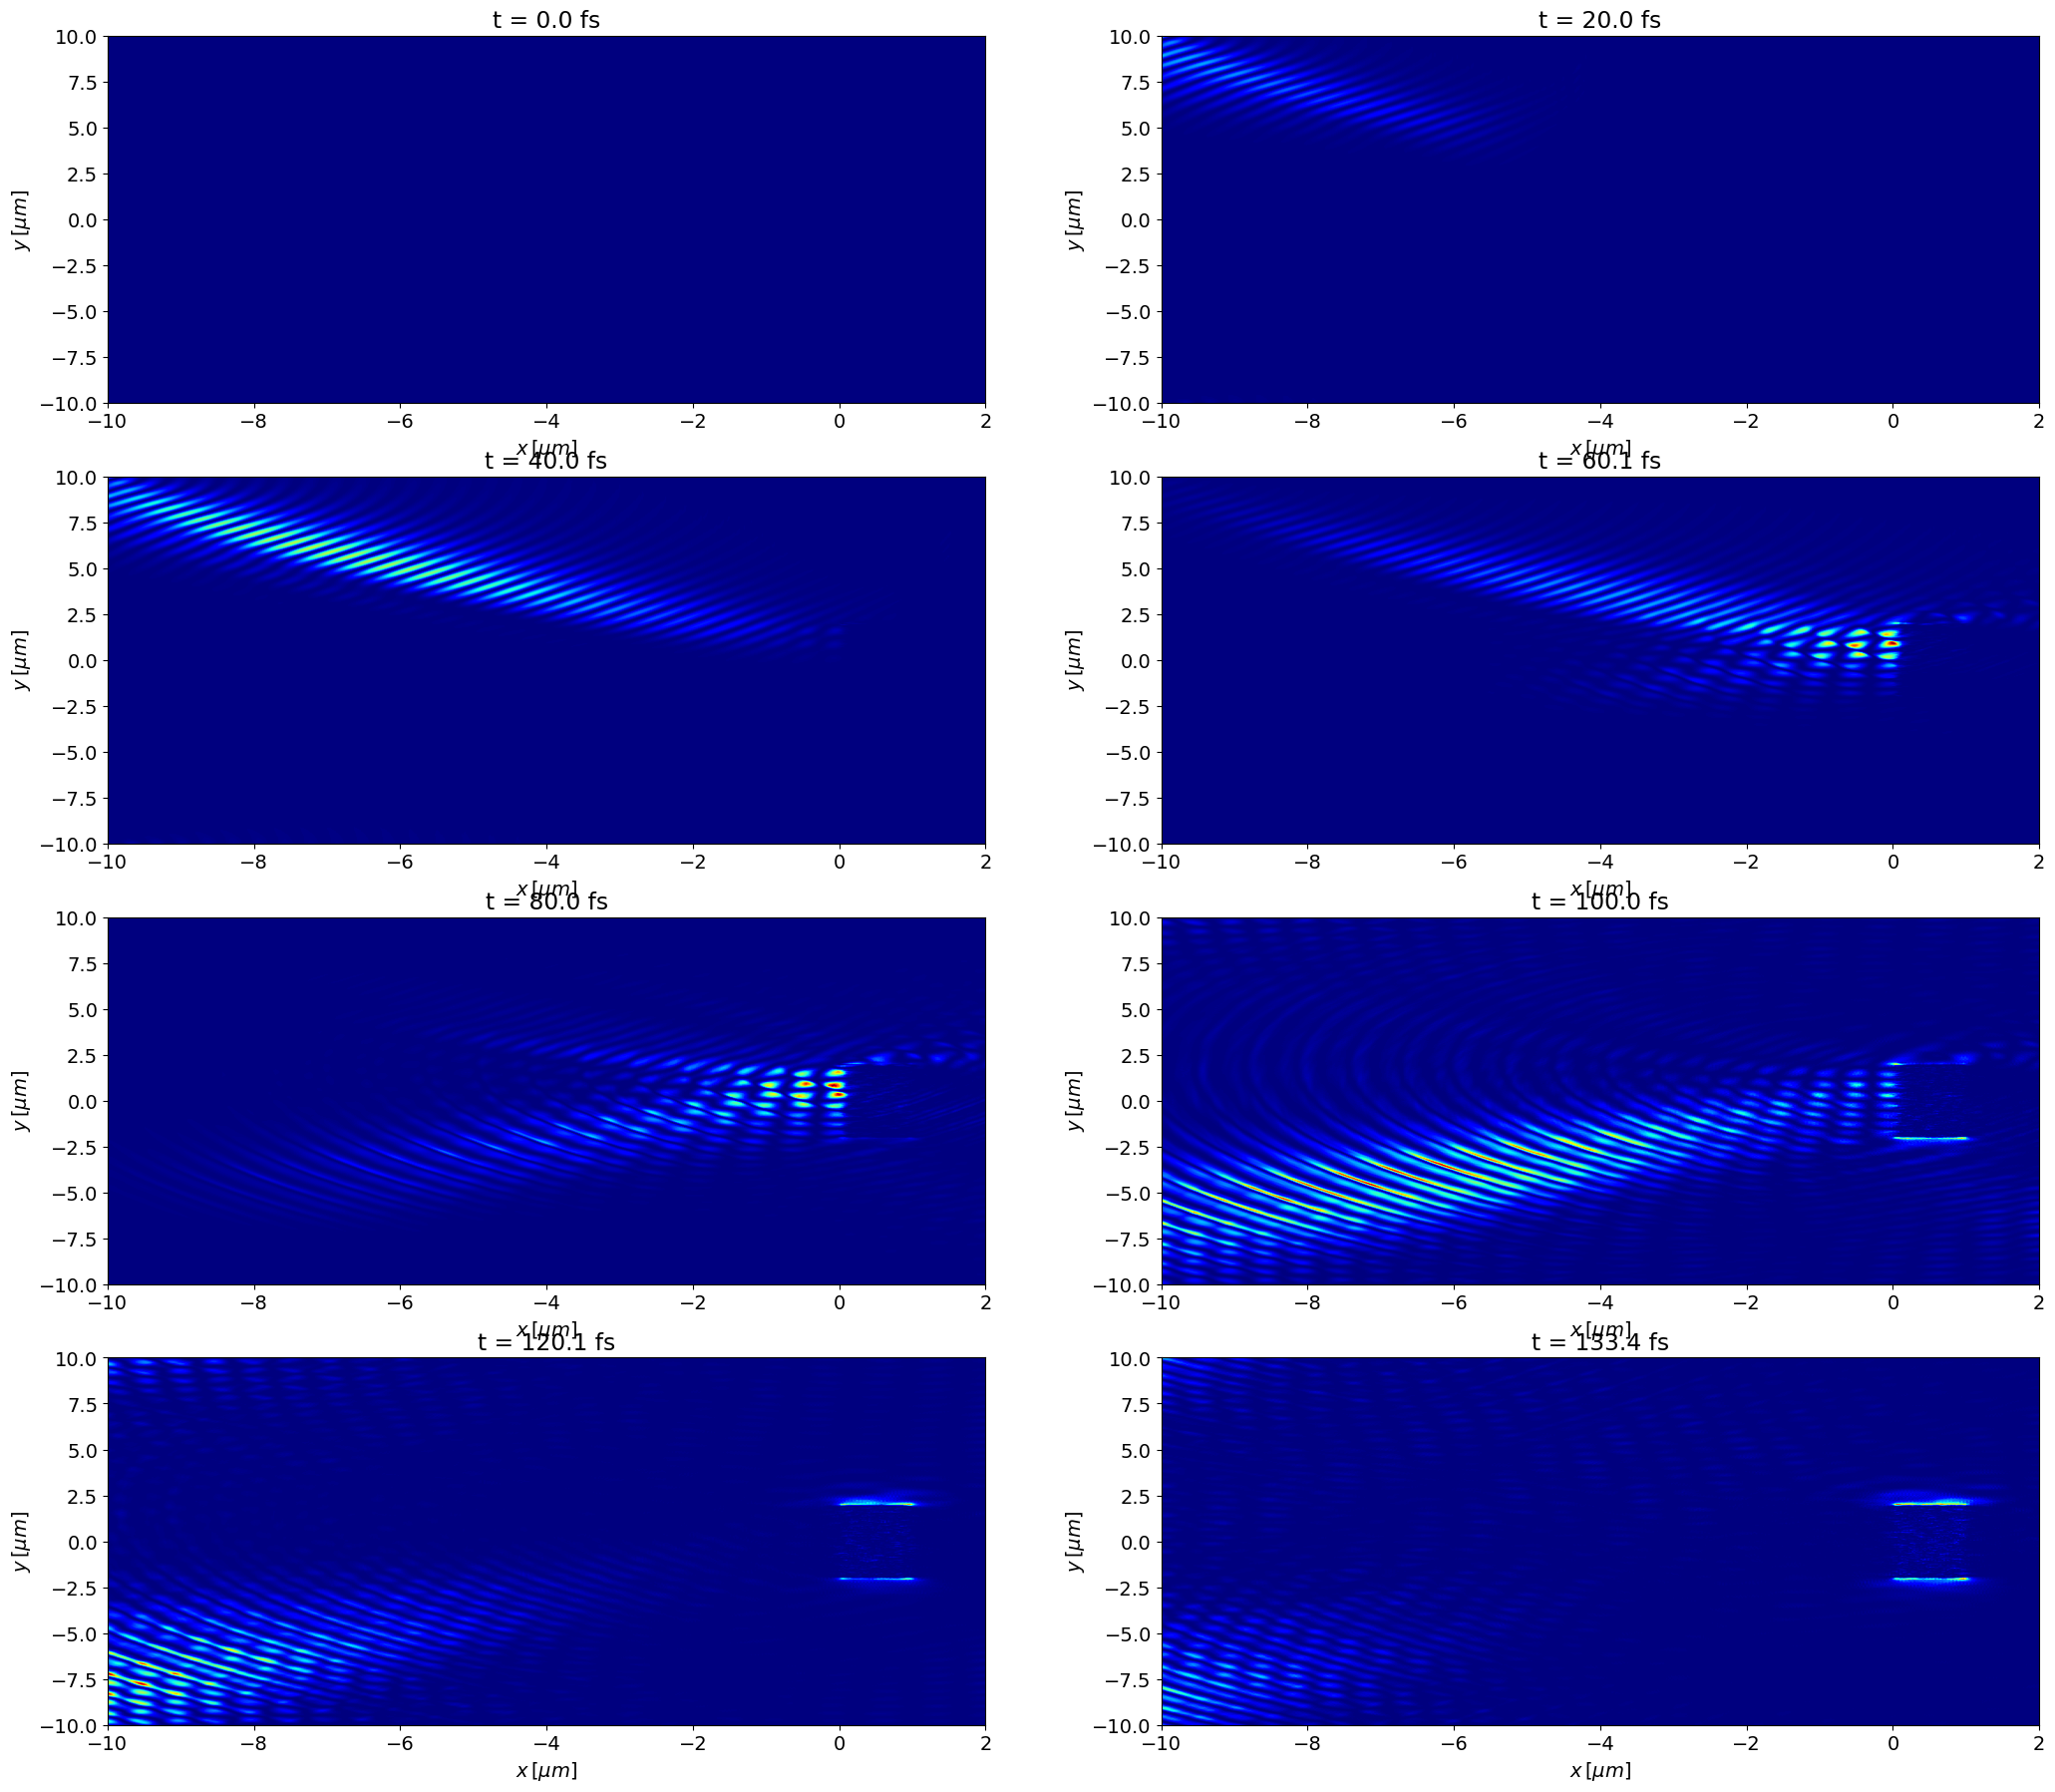

In [36]:
fig, ax = plt.subplots(4, 2, figsize=(25, 22))
ax = ax.flatten()
i = 0
for dir in ALL_FILES:
    plot_field(dir, ax[i], component="y")
    i += 1
    if i == 8:
        break

In [34]:
def x_position_to_node(x):
    return int((x - X_MIN)/(X_MAX - X_MIN)*NX)

def y_position_to_node(y):
    return int((y - Y_MIN)/(Y_MAX - Y_MIN)*NY)

def get_y_for_x(x):
    return x*np.tan(ANGLE)

In [35]:
X_MIN = -8
Y_MIN = -10
X_MAX = 2
Y_MAX = 10
NX = 2000
NY = 4000
THETA = np.pi/6

In [37]:
x_b = -5
y_b = -get_y_for_x(x_b)
x_a = -2
y_a = get_y_for_x(x_a)
x_0 = 0
y_0 = get_y_for_x(x_0)
print(x_b, x_a, x_0)
print(y_b, y_a, y_0)

x_b_node = x_position_to_node(x_b)
y_b_node = y_position_to_node(y_b)
x_a_node = x_position_to_node(x_a)
y_a_node = y_position_to_node(y_a)
x_0_node = x_position_to_node(x_0)
y_0_node = y_position_to_node(y_0)
point_a = (x_a_node, y_a_node)
point_b = (x_b_node, y_b_node)
point_0 = (x_0_node, y_0_node)
print(point_a, point_b, point_0)

-5 -2 0
4.999999999999999 -1.9999999999999998 0.0
(1200, 1600) (600, 3000) (1600, 2000)


In [49]:
raw_data = sdf.read("0514.sdf")

In [59]:
x_b = -5
y_b = -get_y_for_x(x_b)
x_a = -2
y_a = get_y_for_x(x_a)
x_0 = 0
y_0 = get_y_for_x(x_0)
print(x_b, x_a, x_0)
print(y_b, y_a, y_0)

x_b_node = x_position_to_node(x_b)
y_b_node = y_position_to_node(y_b)
x_a_node = x_position_to_node(x_a)
y_a_node = y_position_to_node(y_a)
x_0_node = x_position_to_node(x_0)
y_0_node = y_position_to_node(y_0)
point_a = (x_a_node, y_a_node)
point_b = (x_b_node, y_b_node)
point_0 = (x_0_node, y_0_node)
print(point_a, point_b, point_0)

-5 -2 0
4.999999999999999 -1.9999999999999998 0.0
(1200, 1600) (600, 3000) (1600, 2000)


In [60]:
THETA = np.pi/6

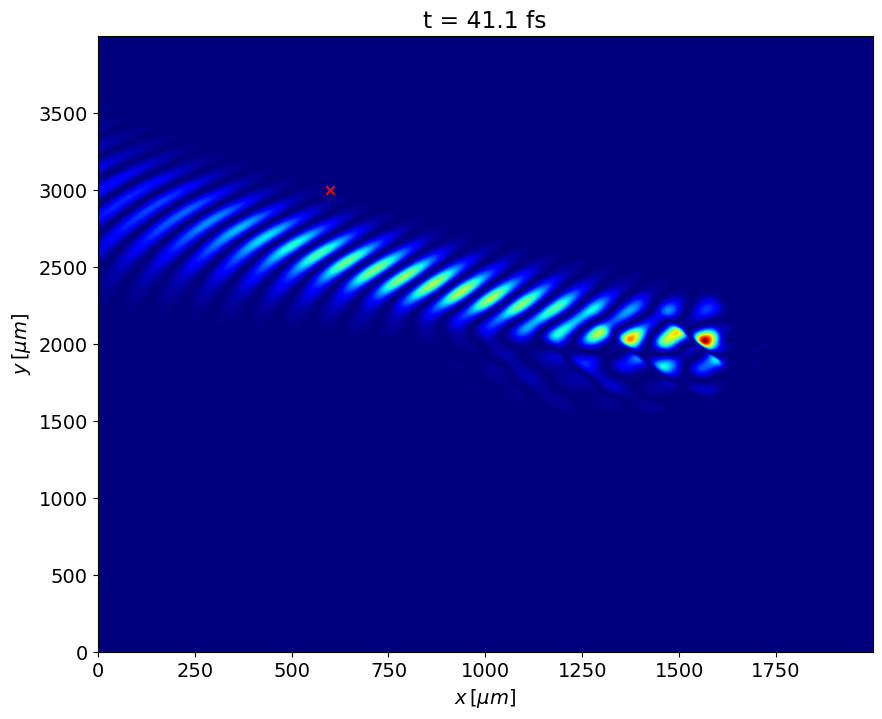

In [61]:
fig, ax = plt.subplots(1, 1)
component = "y"
comp = {
        "x":raw_data.Electric_Field_Ex,
        "y":raw_data.Electric_Field_Ey,
        "z":raw_data.Electric_Field_Ez,
    }
field = comp[component].data.T
t = raw_data.Header['time']*1e15
field = field/(field.max()+1e-10)
ax.imshow(field**2, cmap='jet', origin='lower',
aspect='auto',
# interpolation='nearest',
)
ax.scatter(point_b[0], point_b[1], marker="x", color="red")
ax.set_xlabel('$x \, [\mu m]$')
ax.set_ylabel('$y \, [\mu m]$')
ax.set_title(f't = {t:.1f} fs');